In [0]:
###Loading Data
!pip install -q xlrd
%cd bwsi_testsets
!git clone https://github.com/lylemp/bwsi_testsets
!ls bwsi_testsets #shows the files in this folder. pick the dataset you want


/content/bwsi_testsets
Cloning into 'bwsi_testsets'...
remote: Counting objects: 57, done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 57 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.
allhyper.data.csv		  Nearest_Neighbors.ipynb
allhypo.data.csv		  players_stats.csv
allhypo.test.csv		  README.md
Challenge_project_Ideas.ipynb	  risk_factors_cervical_cancer.csv
chronic_kidney_disease_full.arff  testFolder
data-export (4).csv		  ThoraricSurgery.arff
diabetes.csv			  treesTest
diabetic_data.csv		  US gun crime - SUMMARY 2011.csv
indian_liver_patient.csv	  winequality-red.csv
mushrooms.csv


In [0]:
import pandas as po
dataset=po.read_csv('bwsi_testsets/allhypo.data.csv')

copy=dataset
copy.head()

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


### Final Classifier (Model with binary classification)

In [0]:
import numpy as np

numeric_columns=list(["Age","TSH","T3","TT4","T4u","FTI"])
copy=copy.drop(["TBG measured","TBG"],axis=1)
copy=copy.where(copy!="?",np.nan)
for i in range(len(numeric_columns)):
  copy[numeric_columns[i]]=copy[numeric_columns[i]].fillna(copy[numeric_columns[i]].median(skipna=True))
  copy[numeric_columns[i]]=copy[numeric_columns[i]].apply(po.to_numeric)


In [0]:
for i in range(len(copy)):
  substring=""
  for q in range(len(copy['class'].iloc[i])):
    if copy['class'].iloc[i][q]==".":
      copy['class'].iloc[i]=substring
      break
    substring+=copy['class'].iloc[i][q]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
copy['class'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

In [0]:
for i in range(len(copy)):
  if "hypothyroid" in copy["class"].iloc[i]:
    copy["class"].iloc[i]="positive"
copy["class"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0       negative
1       negative
2       negative
3       negative
4       negative
5       negative
6       negative
7       negative
8       negative
9       negative
10      negative
11      negative
12      negative
13      negative
14      negative
15      positive
16      negative
17      negative
18      negative
19      negative
20      negative
21      negative
22      negative
23      negative
24      negative
25      negative
26      negative
27      negative
28      negative
29      negative
          ...   
2770    negative
2771    negative
2772    positive
2773    negative
2774    negative
2775    negative
2776    negative
2777    negative
2778    negative
2779    negative
2780    negative
2781    negative
2782    negative
2783    negative
2784    negative
2785    negative
2786    negative
2787    negative
2788    negative
2789    negative
2790    negative
2791    negative
2792    negative
2793    negative
2794    negative
2795    negative
2796    negative
2797    negati

Looks like there's still a few missing values in the age column! We could replace the missing values in proportion to the current number of males and females over the total, but that is making an assumption we don't have to make (the persons that didn't answer may be fundamentally different from those that did--a nonresponse bias). For now, let's simply cut these people out.

In [0]:
copy=copy[copy["Sex"].isnull()==False]

copy.count()

Age                          2690
Sex                          2690
On thyroxine                 2690
query on thyroxine           2690
on antithyroid medication    2690
sick                         2690
pregnant                     2690
thyroid surgery              2690
I131 treatment               2690
query hypothyroid            2690
query hyperthyroid           2690
lithium                      2690
goitre                       2690
tumor                        2690
hypopituitary                2690
psych                        2690
TSH measured                 2690
TSH                          2690
T3 measured                  2690
T3                           2690
TT4 measured                 2690
TT4                          2690
T4U measured                 2690
T4u                          2690
FTI measured                 2690
FTI                          2690
referral source              2690
class                        2690
dtype: int64

Nice! Now we have a pretty clean dataset to work with. Let's now do some further data visualization to better understand what we're working with.

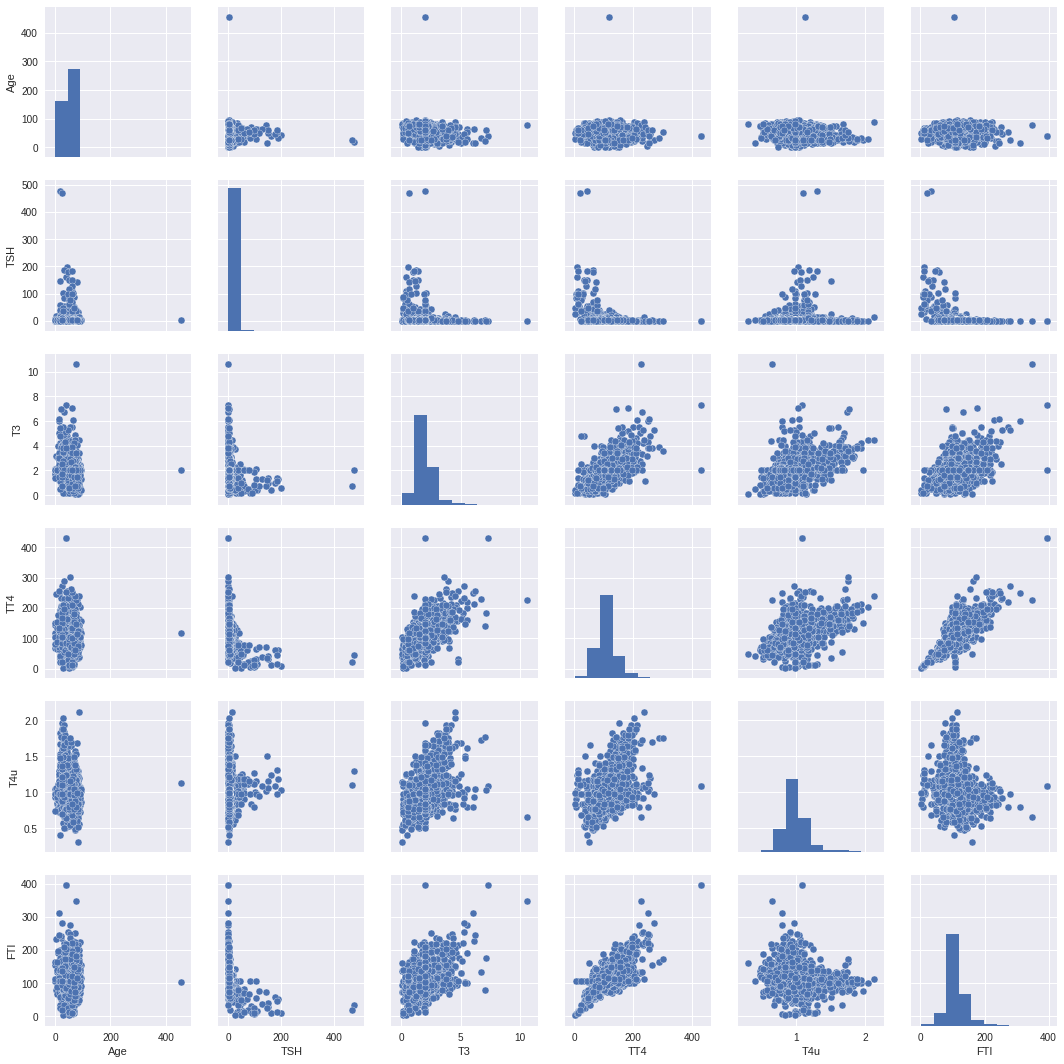

In [0]:
import seaborn as sns
categorical_columns=copy.select_dtypes(include=['object']).columns.tolist()
sns.pairplot(copy)

OK! I think we're ready to create and select some supervised learning models. To get the ball rolling, I've selected Age as our predictor.

In [0]:
##testsetestest
from sklearn.model_selection import train_test_split
data=po.get_dummies(copy,drop_first=True)
print(data.columns)
outcome=data['class_positive']
train,test=train_test_split(data,test_size=0.25,random_state=8675309,stratify=data['class_positive'])# outcome stratification (>explain why)

explanatory_columns=data.columns.values.tolist()
explanatory_columns.remove("class_positive")
explanatory_columns.remove("Sex_M")

print(explanatory_columns)

train_X=train[explanatory_columns]

test_X=test[explanatory_columns]

train_Y=train['class_positive']
test_Y=test['class_positive']

accuracies=[]

from sklearn import metrics
print(len(train))
print(len(test))
test_X

Index(['Age', 'TSH', 'T3', 'TT4', 'T4u', 'FTI', 'Sex_M', 'On thyroxine_t',
       'query on thyroxine_t', 'on antithyroid medication_t', 'sick_t',
       'pregnant_t', 'thyroid surgery_t', 'I131 treatment_t',
       'query hypothyroid_t', 'query hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'TSH measured_t',
       'T3 measured_t', 'TT4 measured_t', 'T4U measured_t', 'FTI measured_t',
       'referral source_SVHC', 'referral source_SVHD', 'referral source_SVI',
       'referral source_other', 'class_positive'],
      dtype='object')
['Age', 'TSH', 'T3', 'TT4', 'T4u', 'FTI', 'On thyroxine_t', 'query on thyroxine_t', 'on antithyroid medication_t', 'sick_t', 'pregnant_t', 'thyroid surgery_t', 'I131 treatment_t', 'query hypothyroid_t', 'query hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t', 'hypopituitary_t', 'psych_t', 'TSH measured_t', 'T3 measured_t', 'TT4 measured_t', 'T4U measured_t', 'FTI measured_t', 'referral source_SVHC', 'referral s

,Age,TSH,T3,TT4,T4u,FTI,On thyroxine_t,query on thyroxine_t,on antithyroid medication_t,sick_t,...,psych_t,TSH measured_t,T3 measured_t,TT4 measured_t,T4U measured_t,FTI measured_t,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
502,76.0,2.300,1.5,93.0,0.71,132.0,0,0,0,0,...,0,1,1,1,1,1,0,0,1,0
2382,73.0,2.700,1.6,97.0,0.78,125.0,0,0,0,0,...,0,1,1,1,1,1,0,0,1,0
1726,58.0,1.800,1.6,102.0,1.07,96.0,0,0,0,0,...,0,1,1,1,1,1,0,0,1,0
980,74.0,6.900,2.0,97.0,0.87,112.0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,1
2727,63.0,0.005,3.4,210.0,1.11,188.0,1,0,0,0,...,0,1,1,1,1,1,0,0,0,1
1038,66.0,2.000,2.1,108.0,0.96,112.0,0,0,0,0,...,0,1,1,1,1,1,0,0,1,0
2010,41.0,1.400,2.0,104.0,0.98,107.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
843,70.0,2.000,1.3,106.0,0.84,125.0,0,0,0,0,...,0,1,1,1,1,1,0,0,1,0
1694,51.0,3.300,1.9,92.0,0.93,98.0,0,0,0,0,...,0,1,1,1,1,1,0,0,0,1
2045,70.0,1.500,0.8,99.0,0.79,126.0,0,0,0,0,...,0,1,1,1,1,1,0,0,1,0


In [0]:
from sklearn.linear_model import LogisticRegression
def log_reg(train_X,train_Y,test_X,test_Y):
  
  lr_model = LogisticRegression()
  lr_model.fit(train_X,train_Y)
  lr_prediction=lr_model.predict(test_X)
  lr_acc=metrics.accuracy_score(lr_prediction,test_Y)
  accuracies.append(lr_acc)
  print('The accuracy of the Logistic Regression is',lr_acc)
  return lr_prediction

log_reg(train_X,train_Y,test_X,test_Y)

The accuracy of the Logistic Regression is 0.9613670133729569


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
from sklearn.tree import DecisionTreeClassifier
def dec_tree(train_X,train_Y,test_X,test_Y):
  dt_model=DecisionTreeClassifier()
  dt_model.fit(train_X,train_Y)
  dt_prediction=dt_model.predict(test_X)
  dt_acc=metrics.accuracy_score(dt_prediction,test_Y)
  accuracies.append(dt_acc)
  print('The accuracy of the Decision Tree is',dt_acc)
  return dt_prediction

dec_tree(train_X,train_Y,test_X,test_Y)

The accuracy of the Decision Tree is 0.9940564635958395


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

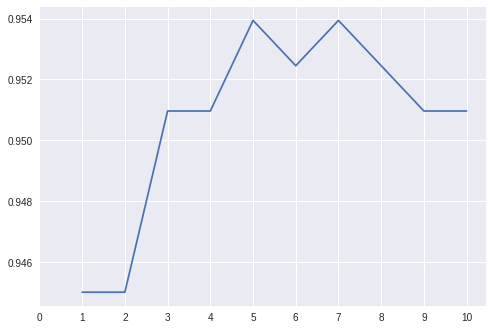

Accuracies for different values of n are: [0.94502229 0.94502229 0.95096582 0.95096582 0.95393759 0.95245171
 0.95393759 0.95245171 0.95096582 0.95096582]


In [0]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
def knn(train_X,train_Y,test_X,test_Y):
  a_index=list(range(1,11))
  a=po.Series()
  x=[0,1,2,3,4,5,6,7,8,9,10]
  for i in list(range(1,11)):
    kn_model=KNeighborsClassifier(n_neighbors=i) 
    kn_model.fit(train_X,train_Y)
    kn_prediction=kn_model.predict(test_X)
    kn_acc=metrics.accuracy_score(kn_prediction,test_Y)
    a=a.append(po.Series(kn_acc))
    accuracies.append(kn_acc)
  plt.plot(a_index, a)
  plt.xticks(x)
  plt.show()
  print('Accuracies for different values of n are:',a.values)
knn(train_X,train_Y,test_X,test_Y)

In [0]:
from sklearn import svm
def sup_vec_mac(train_X,train_Y,test_X,test_Y):
  types=['rbf','linear']
  for i in types:
    svm_model=svm.SVC(kernel=i)
    svm_model.fit(train_X,train_Y)
    svm_prediction=svm_model.predict(test_X)
    svm_acc=metrics.accuracy_score(svm_prediction,test_Y)
    accuracies.append(svm_acc)
    print('Accuracy for SVM kernel=',i,'is',svm_acc)
sup_vec_mac(train_X,train_Y,test_X,test_Y)

Accuracy for SVM kernel= rbf is 0.924219910846954
Accuracy for SVM kernel= linear is 0.9732540861812778


Ok great, we have some accuracies--and they all seem pretty high! Let's compare this to our baseline using a "Zero Rule" algorithm--that is, the expected value of the most common class value. From looking at the statistics from describe(), we know this common value is "negative".

In [0]:
expected=len(test_Y[test_Y==0])/len(test_Y)
for i in range(len(accuracies)):
  print(accuracies[i]>expected)
expected

True
True
True
True
True
True
True
True
True
True
True
True
True
True


0.9212481426448736

In [0]:
def onepropztest(p0,p1,n):
  return [(p1[i]-p0)/((p0*(1-p0))/n)**(1/2) for i in range(len(p1))]
  #return (p1-p0)/((p0*(1-p0))/n)**(1/2)

onepropztest(expected,accuracies,len(test_Y))


[7.584895856983823,
 7.584895856983823,
 2.432891123938208,
 2.432891123938208,
 3.2915585794458173,
 3.005336094276607,
 3.720892307199617,
 4.150226034953416,
 4.150226034953416,
 3.8640035497842167,
 3.8640035497842167,
 4.007114792368816,
 1.0017786980922094,
 7.584895856983823]

Statisticians like using an alpha level of .05, which translates to a z-value of 1.96. None of the values here are greater than 1.96, so at a .05 alpha level we fail to reject the null hypothesis that states the accuracies are equal, and therefore cannot say there is strong evidence to suggest that our model accuracies are, in fact, larger.

Try adding and removing columns yourself until you find statistical significance--and the highest possible accuracies you can get!


But keep in mind accuracy isn't the only way to evaluate your model. As you've seen already, by guessing "negative" for all the records we could already achieve a 92% accuracy. However, that also implies we incorrectly predicted 100% of the positive cases, which in the context of this problem, is fatal. Enter the Receiver-Operator Curve metric!

The diagnostic performance of a test, or the accuracy of a test to discriminate diseased cases from normal cases is evaluated using Receiver Operating Characteristic (ROC) curve analysis.

When you consider the results of a particular test in two populations, one population with a disease, the other population without the disease, you will rarely observe a perfect separation between the two groups. Hence, the overlapping areas in the diagram below (FN, FP).

In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity). Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test.

![alt text](https://www.medcalc.org/manual/_help/images/roc_intro1.png)

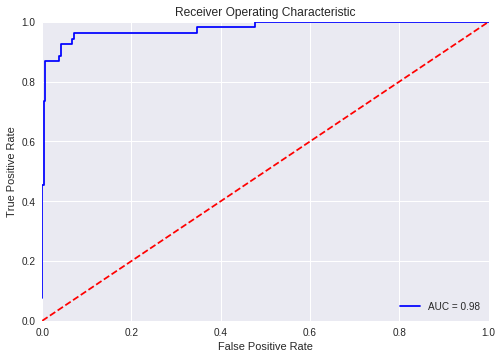

In [0]:
lr_model = LogisticRegression()
lr_model.fit(train_X,train_Y)
lr_probabilities=lr_model.predict_proba(test_X)
predictions = lr_probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_Y, predictions)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Yikes, looks like our suspicions were right. The current logistic regression model seems to just be predicting "negative" for nearly all the cases, as implied by the AUC of 0.51.

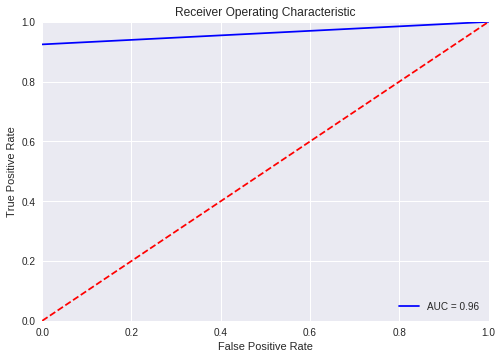

In [0]:
dt_model=DecisionTreeClassifier()
dt_model.fit(train_X,train_Y)
dt_probabilities=dt_model.predict_proba(test_X)
predictions = dt_probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_Y, predictions)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_Y, log_reg(train_X,train_Y,test_X,test_Y))

The accuracy of the Logistic Regression is 0.9613670133729569


array([[618,   2],
       [ 24,  29]])

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_Y, dec_tree(train_X,train_Y,test_X,test_Y))

The accuracy of the Decision Tree is 0.9955423476968797


array([[620,   0],
       [  3,  50]])

So how will you be graded? 

*   Model accuracy
>Most models will have a very high accuracy to begin with, so it'll likely come down to the tenths and hundredths place.
*   Model AUROC
>More emphasis will be placed on how well your model predicts both class values, so a greater AUROC means a greater score!
*   Creativity
>Feature selection, feature engineering, and further data cleaning are all ways to improve your creativity!

The top scorer will receive a prize!

For those that finish early and decide to tackle the multiclass classifier (predicting the different types of positive cases instead of simply negative or positive), 